## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Nearest Neighbor Classifier on MNIST

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from tqdm import tqdm

In [2]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [4]:
NTest = 10000
XTrain = MnistTrainX 
yTrain = MnistTrainY
XTest  = MnistTestX[0:NTest,:]
yTest = MnistTestY[0:NTest]

In [5]:
nearestNeighbor = np.zeros(NTest, dtype = int)
f = open('nearestNeighbor.txt', 'r')
for n in range (NTest):
    nearestNeighbor[n] = int(f.readline())
f.close()

In [6]:
misclassified = yTrain[nearestNeighbor] != yTest

In [7]:
#sum(misclassified) = 309
rows = 24
cols = 26
img = np.zeros([rows*29,cols*29])

row = 0
col = 0
for n in range (NTest):
    if (~misclassified[n]):
        continue
    img[row*2*29:row*2*29+28,col*29:col*29+28] = np.reshape(XTest[n,:], [28,28])
    idx = nearestNeighbor[n]
    img[row*2*29+29:row*2*29+29+28,col*29:col*29+28] = np.reshape(XTrain[idx,:], [28,28])
    col += 1
    if (col == 26):
        img[(row+1)*2*29-1,0:cols*29] = 1                
        row += 1
        col = 0

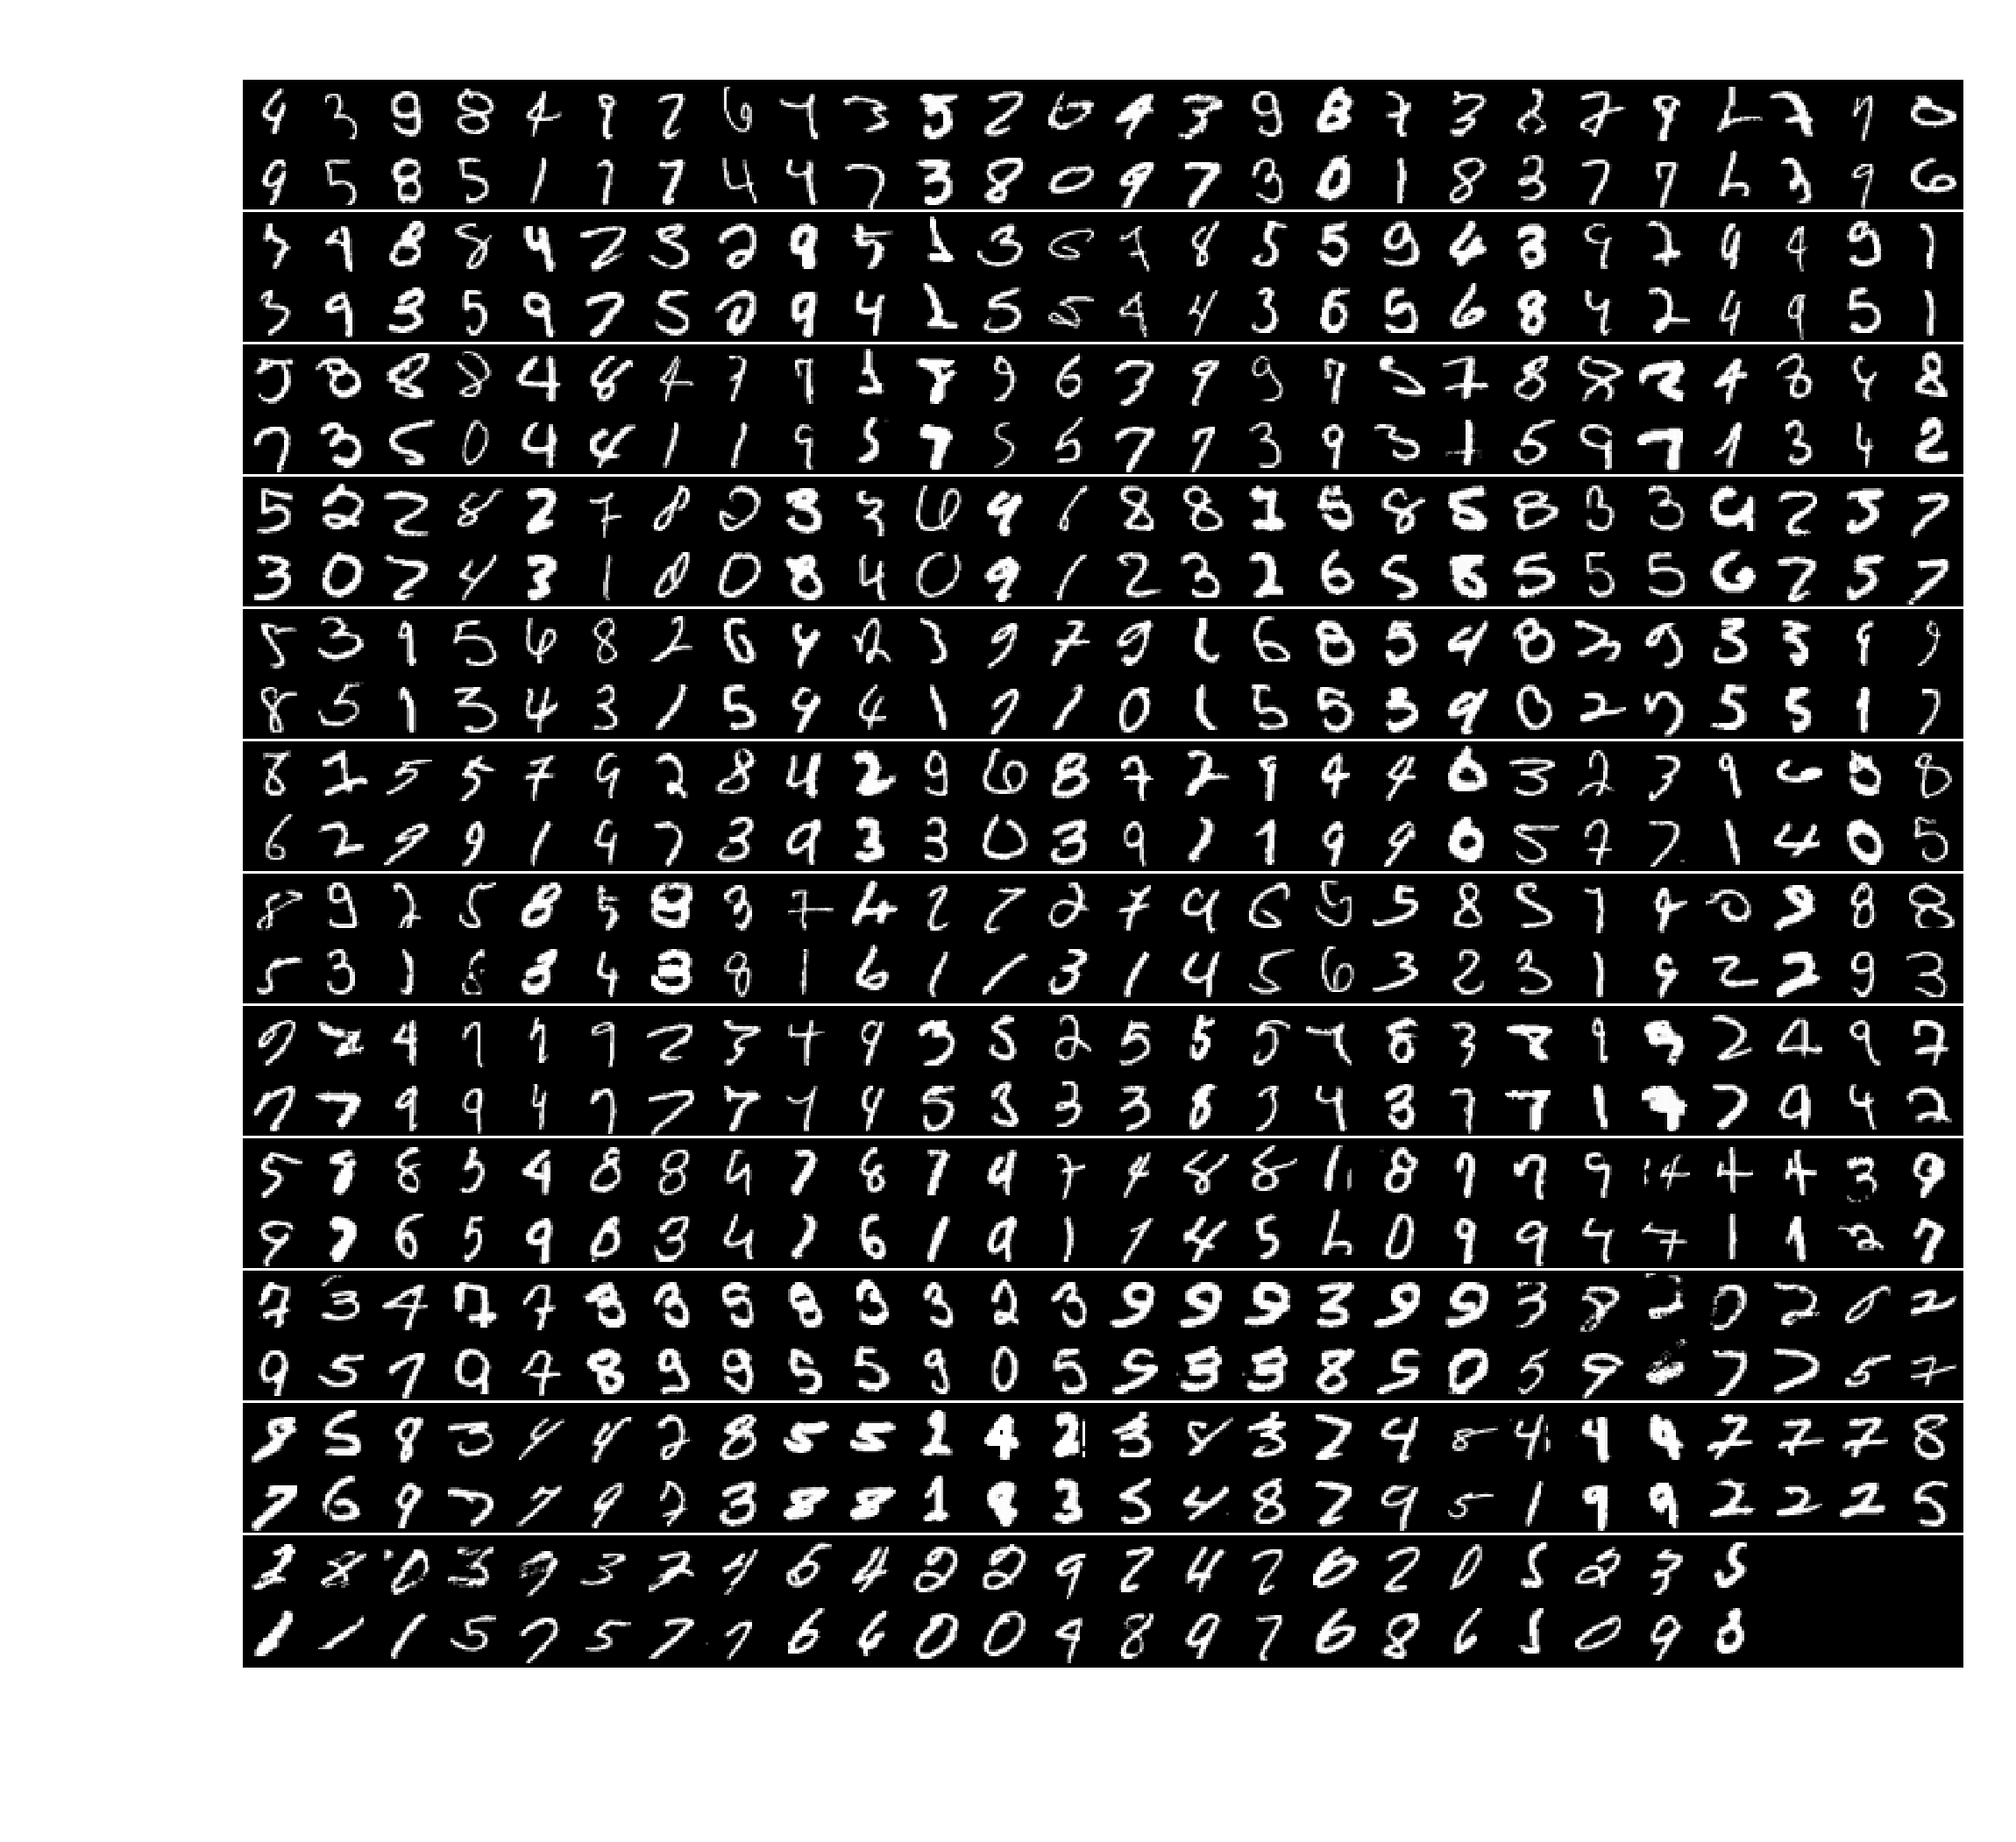

In [8]:
plt.imshow(img, cmap='gray')
plt.imsave('mnist_nearest_neighbor_misclassified.png', img)
plt.axis('off')
plt.show()